In [72]:
import matplotlib.pyplot as plt
import numpy as np 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization



In [57]:
#loading the train file
train_data = np.load('data/fashion_train.npy')
test_data = np.load('data/fashion_test.npy')

#splitting the labels from the data and changing the labels type
train, train_labels = train_data[:,:-1], train_data[:,-1].astype(np.int32) 
test, test_labels = test_data[:,:-1], test_data[:,-1].astype(np.int32)

In [58]:
#makinh hotones
train_labels_hotones = np.zeros((10000,5))
train_labels_hotones[np.arange(10000,), train_labels] = 1

test_labels_hotones = np.zeros((5000,5))
test_labels_hotones[np.arange(5000,), test_labels] = 1

In [59]:
#normalize the data
train =train.reshape(-1, 28, 28, 1) / 255.0
test = test.reshape(-1, 28, 28, 1) / 255.0


In [60]:
#mapping the classes
mapping = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "shirt",
    
}

In [76]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5))
model.add(Activation('softmax'))

In [77]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [78]:
fit_model = model.fit(train, train_labels_hotones, validation_split=0.33, epochs=7, batch_size=64)
print(fit_model)

Epoch 1/7
105/105 [==============================] - 5s 41ms/step - loss: 0.6343 - accuracy: 0.7485 - val_loss: 1.6186 - val_accuracy: 0.1999
Epoch 2/7
105/105 [==============================] - 4s 39ms/step - loss: 0.4335 - accuracy: 0.8333 - val_loss: 1.6070 - val_accuracy: 0.2972
Epoch 3/7
105/105 [==============================] - 4s 39ms/step - loss: 0.3453 - accuracy: 0.8685 - val_loss: 0.7629 - val_accuracy: 0.7286
Epoch 4/7
105/105 [==============================] - 4s 38ms/step - loss: 0.2921 - accuracy: 0.8946 - val_loss: 0.5175 - val_accuracy: 0.8261
Epoch 5/7
105/105 [==============================] - 4s 38ms/step - loss: 0.2569 - accuracy: 0.9030 - val_loss: 0.5305 - val_accuracy: 0.8085
Epoch 6/7
105/105 [==============================] - 4s 38ms/step - loss: 0.2206 - accuracy: 0.9191 - val_loss: 0.4192 - val_accuracy: 0.8434
Epoch 7/7
105/105 [==============================] - 4s 38ms/step - loss: 0.1722 - accuracy: 0.9364 - val_loss: 0.4700 - val_accuracy: 0.8479


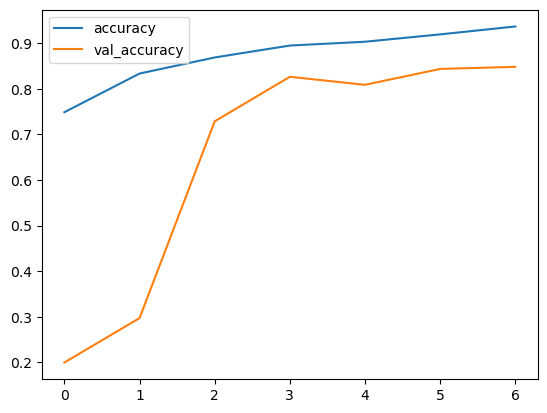

In [79]:
# Plot training and validation accuracy
plt.plot(fit_model.history['accuracy'], label='accuracy')
plt.plot(fit_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

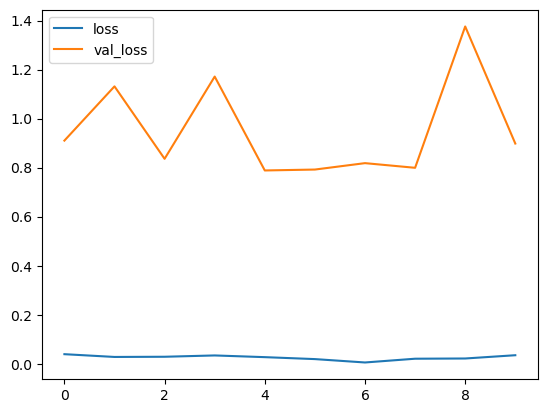

In [80]:
# Plot training and validation loss
plt.plot(fitted_model.history['loss'], label='loss')
plt.plot(fitted_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [81]:
test_model = model.evaluate(test, test_labels_hotones, verbose=1)

157/157 [==============================] - 1s 7ms/step - loss: 0.4913 - accuracy: 0.8398


In [82]:
print("On Test Data:")
print(model.metrics_names[0] + " = {}".format(test_model[0]))
print(model.metrics_names[1] + " = {}".format(test_model[1]))

On Test Data:
loss = 0.4912790060043335
accuracy = 0.8398000001907349


1/1 [==============================] - 0s 27ms/step
Predicted as T-shirt/top


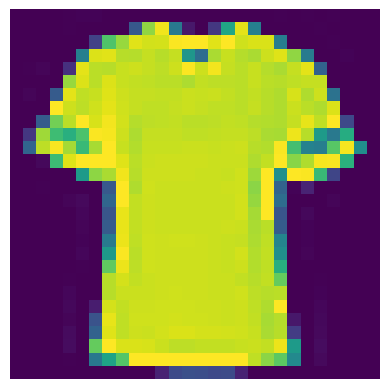

<Figure size 2800x2800 with 0 Axes>

In [70]:
plt.imshow(test[1].reshape(28,28))
plt.axis('off')
plt.figure(figsize=(28,28))
class_val = np.argmax(model.predict(test[1].reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))